In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from importlib import reload
import TwistedBilayerGraphene as t
reload(t)

<module 'TwistedBilayerGraphene' from '/Users/gordonwongyl/Documents/FYP/TBG/TwistedBilayerGraphene.py'>

In [91]:
N = 400
spectrum = np.load(f"magic_angle_BZ/CSCM_BZ_{N}_by_{N}_spectrum.npy")
eigenvectors_bz = np.load(f"magic_angle_BZ/CSCM_BZ_{N}_by_{N}_eigenvector.npy")

In [92]:
# compute FSM with the norm formula (eq. 5 in report)
def FSM(BZ: np.ndarray):
    n1, n2, _ = BZ.shape
    g = np.zeros((2,2, n1, n2))
    for i in range(n1):
        for j in range(n2):
            k = BZ[i,j,:]
            k_dk = (BZ[(i+1)%n1, j, :], BZ[i, (j+1)%n2, :], BZ[(i+1)%n1, (j+1)%n2, :])
            A = np.abs(np.inner(k.conj(), k_dk[0]))**2
            B = np.abs(np.inner(k.conj(), k_dk[1]))**2
            C = np.abs(np.inner(k.conj(), k_dk[2]))**2
            g[0, 0, i, j] = 1 - A
            g[0, 1, i, j] = 0.5*(A+B-C-1)
            g[1, 0, i, j] = 0.5*(A+B-C-1) 
            g[1, 1, i, j] = 1 - B
    return g

# compute Berry curvature with Susuki formula
def curvature(BZ: np.ndarray, dk1=None, dk2=None):
    n1, n2, _ = BZ.shape
    F = np.zeros((n1, n2), dtype=complex)
    for i in range(n1):
        for j in range(n2):
            k = BZ[i,j,:]
            k_dk = (BZ[(i+1)%n1, j, :], BZ[i, (j+1)%n2, :], BZ[(i+1)%n1, (j+1)%n2, :])
            
            A = np.inner(k.conj(), k_dk[0])
            B = np.inner(k_dk[0].conj(), k_dk[2])
            C = np.inner(k_dk[2].conj(), k_dk[1])
            D = np.inner(k_dk[1].conj(), k)
            F[i, j] = np.log(A*B*C*D)
    return -F

In [93]:
N = 400
axis = [-N//2, N//2-1]
coord_list = t.generate_pairs_numpy(axis, axis)/(N//4)
MA_alpha = 1.757/3
prop_const = t.omega_1/t.v_F_hbar/2/t.k_D
theta_rad_MA = 2*np.arcsin(prop_const/MA_alpha)
theta_deg = np.rad2deg(theta_rad_MA)
tbg = t.CSCM(theta_rad_MA, 8, 20)
k_theta = tbg.k_theta
BZ = eigenvectors_bz[:,:,:,0]
dk = k_theta/N


In [88]:
print(f"{dk:.3e}")
BZ.shape

8.165e-04


(400, 400, 324)

In [94]:
# compute Berry curvature
F = curvature(BZ)/dk/dk
# compute FSM
g = FSM(BZ)/dk/dk
positions = np.array([0, 24, 49, 74, 99])*4


Text(0, 0.5, '$k_y$')

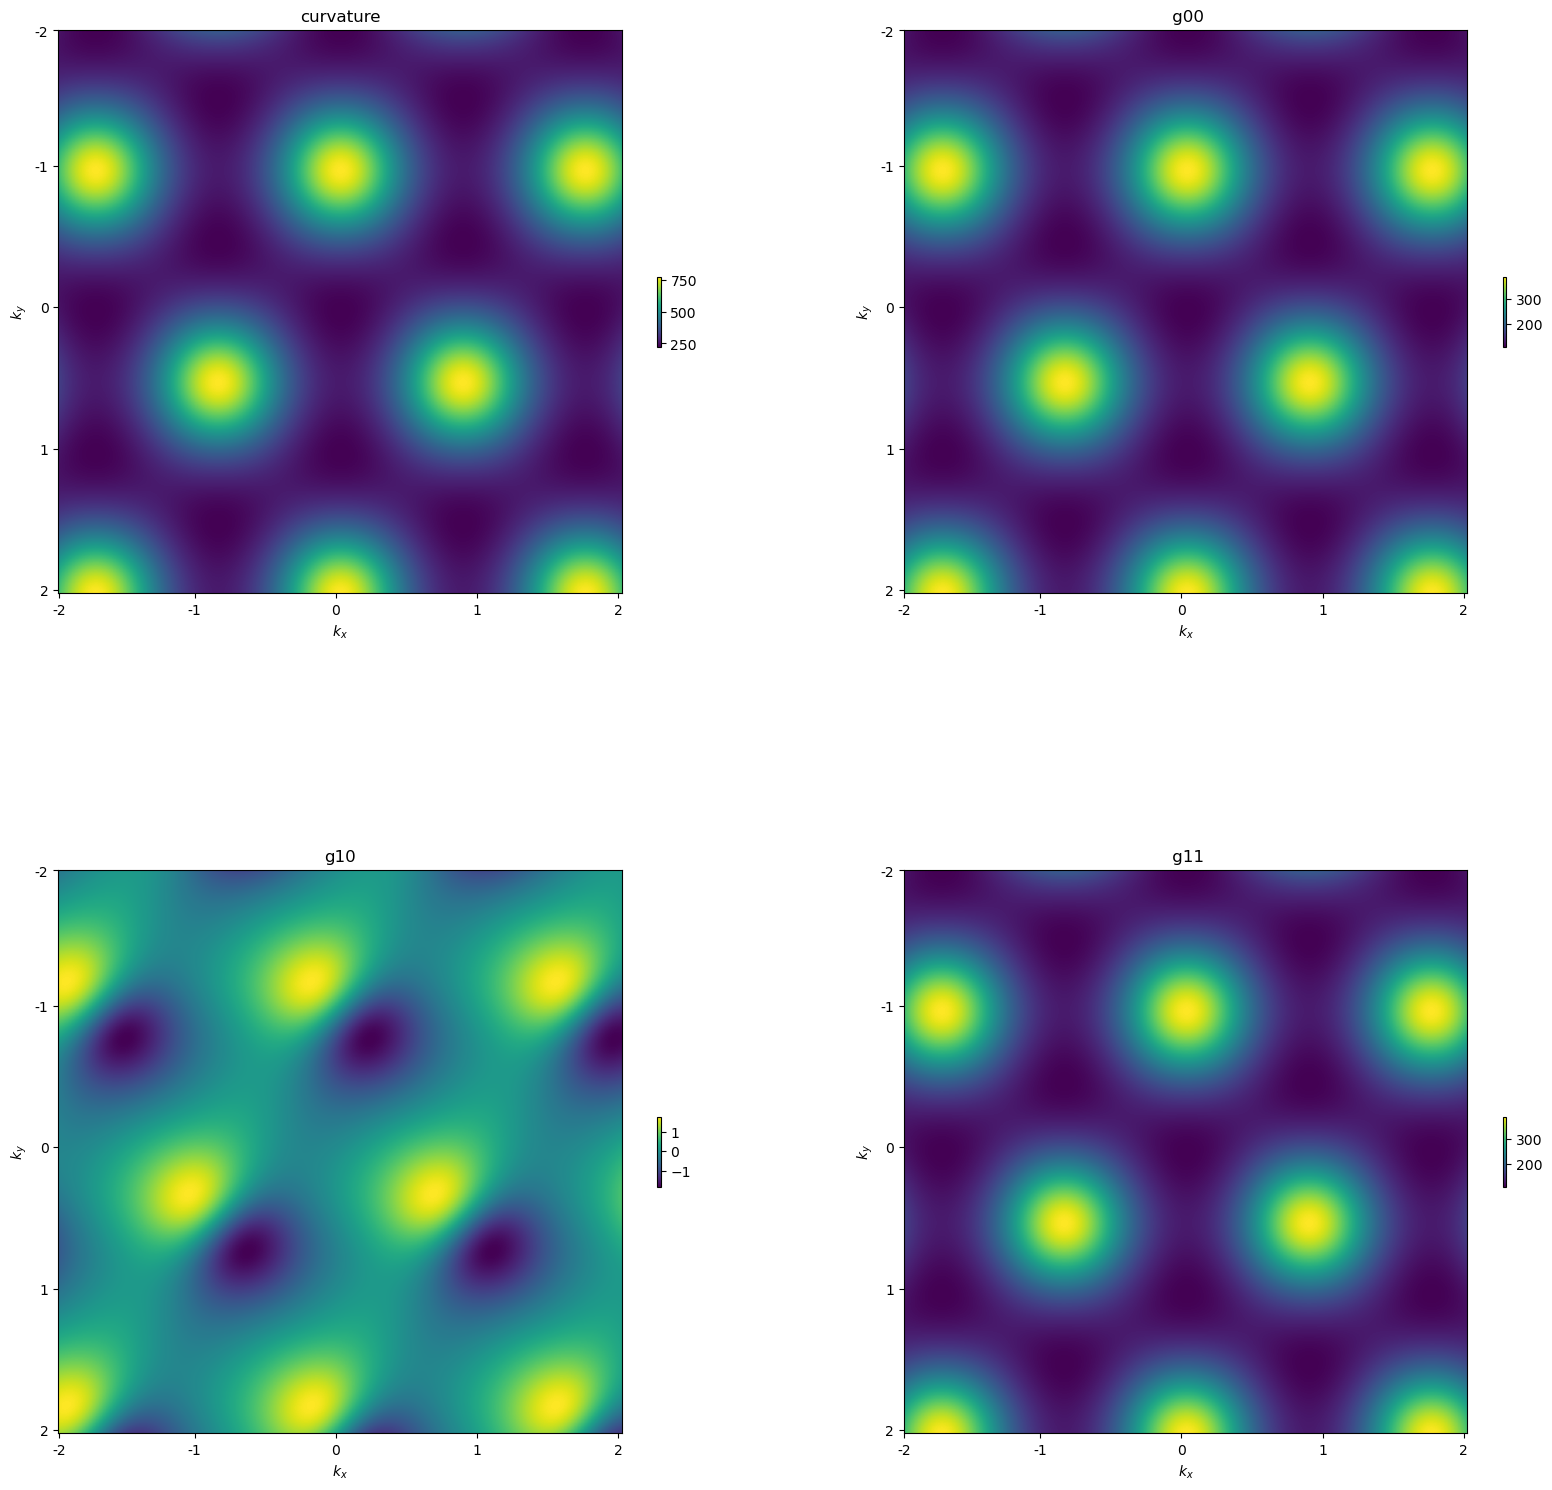

In [102]:

ticks = [-2, -1, 0, 1, 2]
fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax = ax.flatten()
im = ax[0].imshow(F.imag[:-1,:-1])
plt.colorbar(im, ax=ax[0], shrink=0.1)
im = ax[1].imshow(g[0,0,:-1,:-1])
plt.colorbar(im, ax=ax[1], shrink=0.1)
im = ax[2].imshow(g[0,1,:-1,:-1])
plt.colorbar(im, ax=ax[2], shrink=0.1)
im = ax[3].imshow(g[1,1,:-1,:-1])
plt.colorbar(im, ax=ax[3], shrink=0.1)
ax[0].set(title=f"curvature")
ax[1].set(title=f" g00")
ax[2].set(title=f"g10")
ax[3].set(title=f" g11")

ax[0].set_xticks(positions)
ax[0].set_xticklabels(ticks)

ax[0].set_yticks(positions)
ax[0].set_yticklabels(ticks)

ax[1].set_xticks(positions)
ax[1].set_xticklabels(ticks)

ax[1].set_yticks(positions)
ax[1].set_yticklabels(ticks)

ax[2].set_xticks(positions)
ax[2].set_xticklabels(ticks)

ax[2].set_yticks(positions)
ax[2].set_yticklabels(ticks)

ax[3].set_xticks(positions)
ax[3].set_xticklabels(ticks)

ax[3].set_yticks(positions)
ax[3].set_yticklabels(ticks)

ax[0].set_xlabel(r"$k_x$")
ax[0].set_ylabel(r"$k_y$")
ax[1].set_xlabel(r"$k_x$")
ax[1].set_ylabel(r"$k_y$")
ax[2].set_xlabel(r"$k_x$")
ax[2].set_ylabel(r"$k_y$")
ax[3].set_xlabel(r"$k_x$")
ax[3].set_ylabel(r"$k_y$")

# plt.savefig(f"magic_angle_BZ/curvature_FSM_{N}_by_{N}.png", dpi=500)

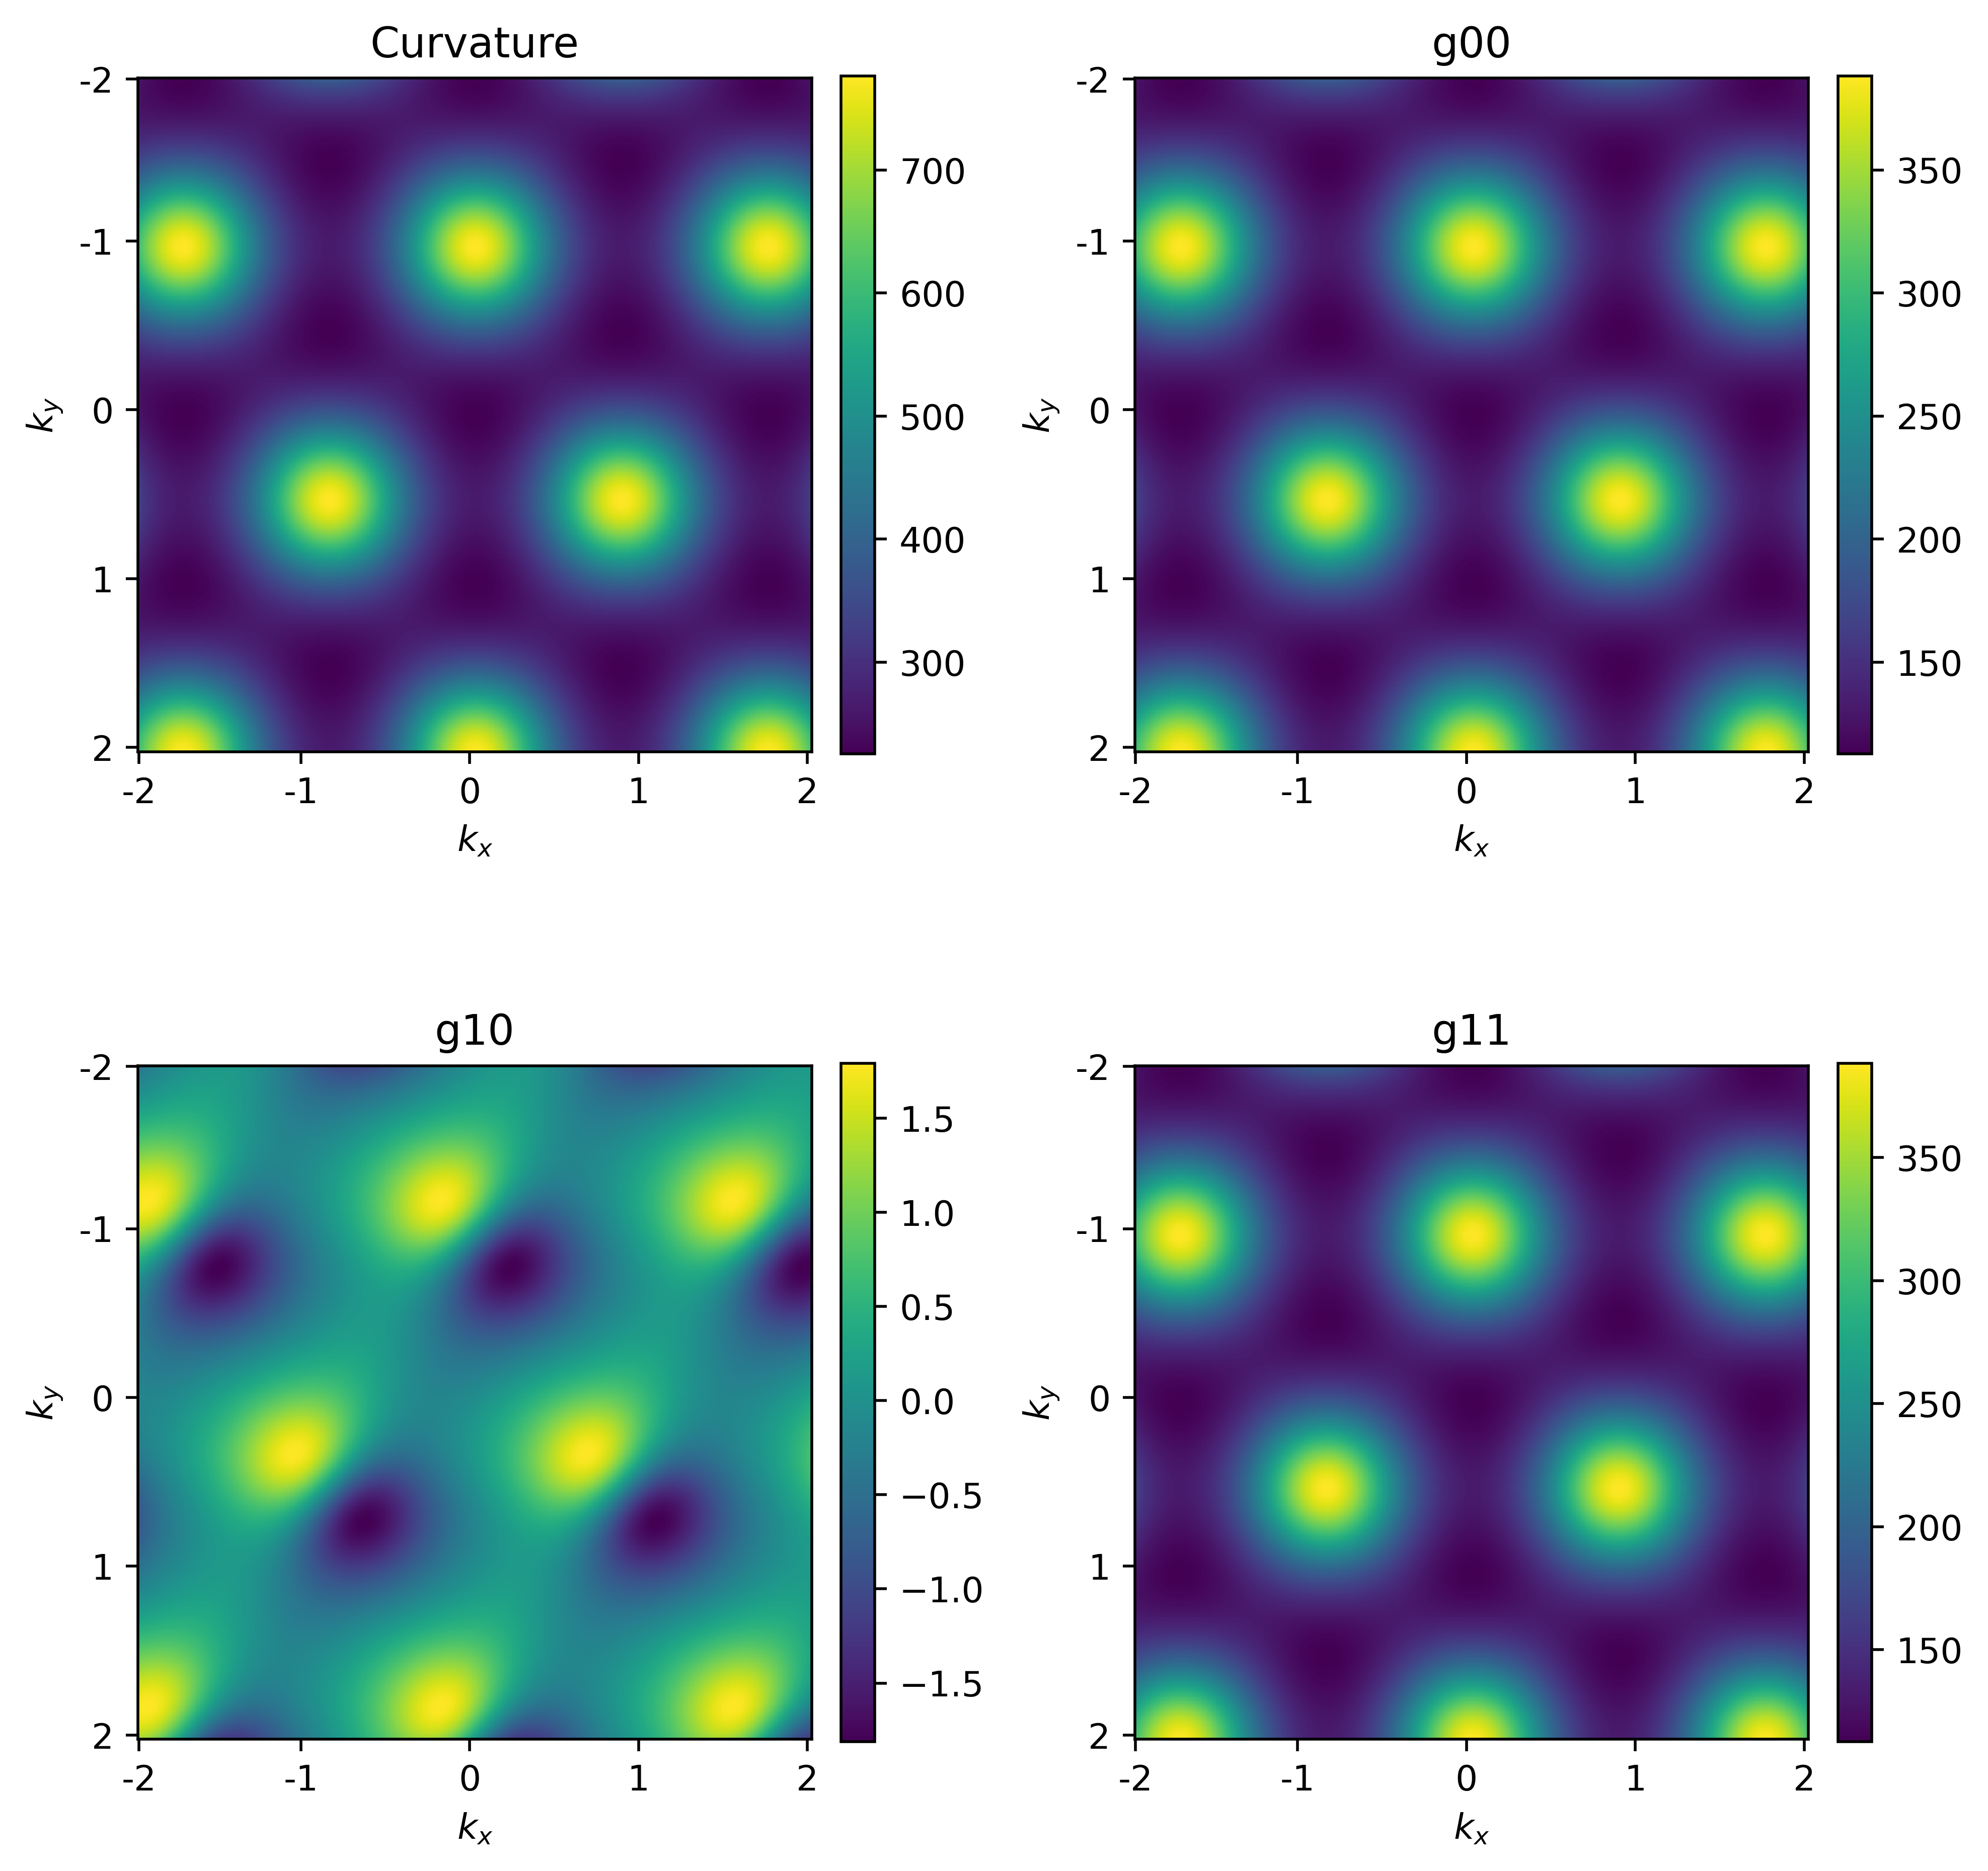

In [112]:


ticks = [-2, -1, 0, 1, 2]
positions = np.array([0, 24, 49, 74, 99])*4  # Your tick positions here

fig, ax = plt.subplots(2, 2, figsize=(8, 8), dpi=500)
ax = ax.flatten()

# Plot images
im0 = ax[0].imshow(F.imag[:-1,:-1])
im1 = ax[1].imshow(g[0,0,:-1,:-1])
im2 = ax[2].imshow(g[0,1,:-1,:-1])
im3 = ax[3].imshow(g[1,1,:-1,:-1])

# Add colorbars with consistent sizing
cbar0 = plt.colorbar(im0, ax=ax[0], fraction=0.046, pad=0.04)
cbar1 = plt.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
cbar2 = plt.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)
cbar3 = plt.colorbar(im3, ax=ax[3], fraction=0.046, pad=0.04)

# Set titles
ax[0].set(title="Curvature")
ax[1].set(title="g00")
ax[2].set(title="g10")
ax[3].set(title="g11")

# Configure ticks and labels for all subplots
for a in ax:
    a.set_xticks(positions)
    a.set_xticklabels(ticks)
    a.set_yticks(positions)
    a.set_yticklabels(ticks)
    a.set_xlabel(r"$k_x$")
    a.set_ylabel(r"$k_y$")

plt.tight_layout()
plt.savefig(f"magic_angle_BZ/curvature_FSM_{N}_by_{N}.png", dpi=500)

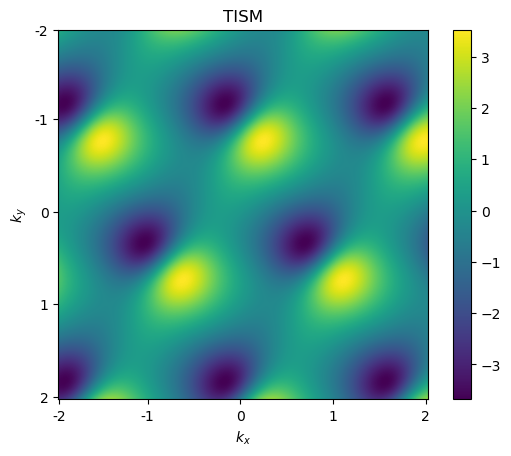

In [111]:
trg = g[0,0,:-1,:-1] + g[1,1,:-1,:-1]
TISM = trg - np.abs(F.imag[:-1,:-1])
plt.imshow(TISM)
plt.colorbar()
plt.title(f"TISM")
plt.xlabel(r"$k_x$")
plt.ylabel(r"$k_y$")
plt.xticks(positions, ticks)
plt.yticks(positions, ticks)
plt.savefig(f"magic_angle_BZ/TISM_{N}_by_{N}.png", dpi=300)

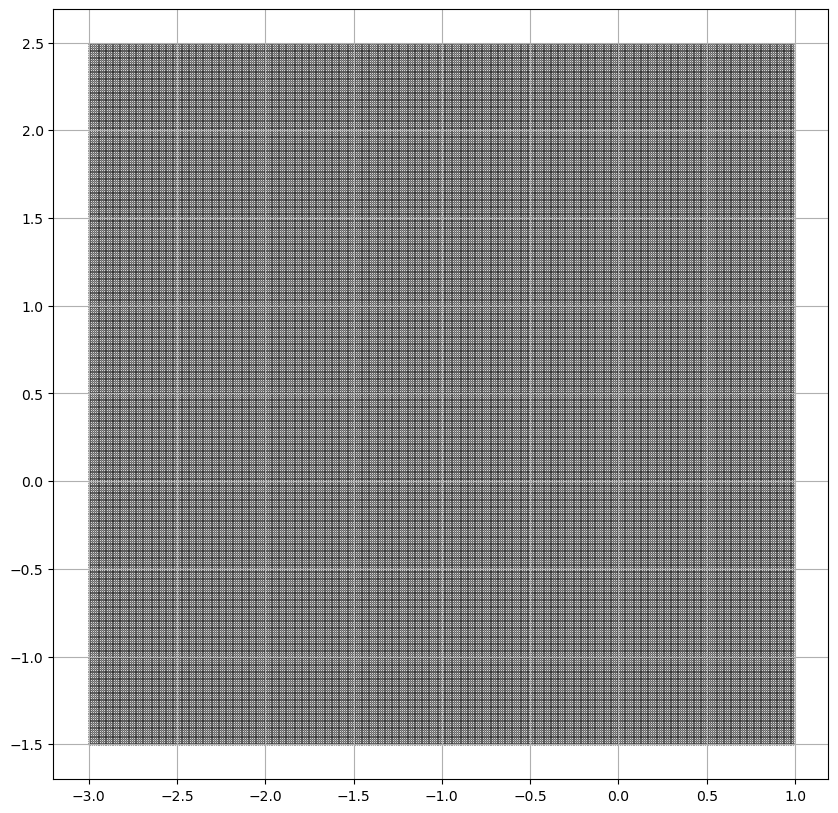

In [80]:
# Diagonalize over Brillouin zone
N = 400
axis = [-N//2, N//2-1]
coord_list = t.generate_pairs_numpy(axis, axis)/(N//4) 
coord_list[:,0] = coord_list[:,0] - np.ones(coord_list[:,0].shape)
coord_list[:,1] = coord_list[:,1] + 0.5*np.ones(coord_list[:,1].shape)

MA_alpha = 1.757/3
prop_const = t.omega_1/t.v_F_hbar/2/t.k_D
theta_rad_MA = 2*np.arcsin(prop_const/MA_alpha)
theta_deg = np.rad2deg(theta_rad_MA)
num_eigvalues = 2
plt.figure(figsize=(10,10))
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)
plt.grid()
plt.scatter(coord_list[:,0], coord_list[:,1], s=0.1, c='k')

In [ ]:
tbg = t.CSCM(theta_rad_MA, k_cutoff=8, sublattice_potential=20)
H = tbg.Hamiltonian((0,0))
spectrum_bz = np.zeros((N, N, num_eigvalues))
eigenvectors_bz = np.zeros((N, N, 2*len(tbg.k_set), num_eigvalues), dtype=complex)
for i in range(N):
    for j in range(N):
            k = coord_list[i*N+j]
            # print(k)
            H = tbg.Hamiltonian(k)
            eigenvalues, eigenvectors = np.linalg.eigh(H)
            # Choose the middle eigenvalues
            # mid_index = len(eigenvalues) // 2
            # half_range = num_eigvalues//2
            # eigenvalues = eigenvalues[mid_index-half_range:mid_index+half_range]
            # eigenvectors = eigenvectors[:, mid_index-half_range:mid_index+half_range]
            
            # Sort eigenvalues and eigenvectors
            sorted_indices = np.argsort(eigenvalues)
            eigenvalues = eigenvalues[sorted_indices]
            eigenvectors = eigenvectors[:, sorted_indices]
            # spectrum_bz[i,j,:] = eigenvalues
            # eigenvectors_bz[i,j,:,:] = eigenvectors

            
    print(f"finishing {i} of {N}")
    if (i+1) % 10 == 0: clear_output(wait=True)
    
filename = f"magic_angle_BZ/CSCM_BZ_{N}_by_{N}_"
np.save(filename + "spectrum.npy", spectrum_bz) 
np.save(filename + "eigenvector.npy", eigenvectors_bz)